# Introdução ao SageMath
***

**SageMath** (ou simplesmente sage) é um sistema de computação algébrica. Dentre outras, algumas vantágens de usar sistemas desse tipo são:

- Você pode se concentrar mais nas idéias (modelo, formulação, teoria) e menos nas "contas";
- Os resultados estendidos, generalizados e analisados com facilidade;
- Você pode explorar a estrutura matemática em torno do seu problema, o sage é ótimo para isso;
- Seus resultados podem ser compartilhados de uma forma reprodutível;
- Depois de investir algum tempo aprendendo o básico, você poderá resolver problema de forma muito mais rápido e com mais ferramentas;
- Você só precisa saber um conjunto básico de comandos e sintaxe, para todo o restante pode usar os recursos de ajuda e a documentação;

[SageMathCell](https://sagecell.sagemath.org/)

***
### Nessa aula veremos:

1. Pré-documento;
2. Operações básicas;
3. Variáveis simbólicas;
4. Expressões simbólicas;
5. Equações, inequações e sistemas
6. Funções e substituição de variáveis em expressões simbólicas
7. Pacotes opcionais
8. Jupyter  notebook
9. Markdown básico
***

## 1. Pré-documento

Você pode fazer o jupyter exibir as equações no formato $\LaTeX{}$ digitando `%display latex` em uma célula.

In [1]:
%display latex # outras opções são plain, ascii_art e unicode_art

In [2]:
reset() #inicializa todas as variáveis

## 2. Operações Básicas

No Sage as operações básicas com números reais, complexos, racionais, etc., são realizadas como nas calculadoras científicas. Frações e raízes são automaticamente simplificadas

In [3]:
15/25+3/2

21/10

In [4]:
sqrt(20)/pi

2*sqrt(5)/pi

Aproximação numérica

In [5]:
sqrt(20).n()

4.47213595499958

In [6]:
sqrt(20.0)

4.47213595499958

In [7]:
abs(-10)

10

Algumas operações e funções básicas do Sage:

|Operação|Sintáxe|
|:-:|:-:|
|4 operações | `a+b, a-b, a*b, a/b`|
|Potêmcia | `a**b ou a^b`|
|Raiz quadrada | `sqrt(a)`|
|Divisão inteira | `a//b`|
|Resto na divisão | `a%b`|
|Fatorial | `factorial(a)`|
|Coeficiente binômial $\begin{pmatrix} a\\ b\end{pmatrix}$ | `binomial(a,b)`|
|Parte inteira | `floor(a)`|
|Valor absoluto | `abs(a)`|
|Aproximação numérica | `N(a) ou a.n()`|

## 3. Variáveis simbólicas

Existem dois tipos básicos de variáveis no sage:

* As variáveis simbólicas, usadas nos cálculos simbólicos;

* Variáveis python, que são usadas para guardas alguma informação na memória. 

Variáveis simbólicas precisam ser declaradas. Exceto `x`, que já vem pré-declarada.

In [8]:
var('u y w a b c') 

(u, y, w, a, b, c)

In [9]:
u*a^c

a^c*u

Uma lista de varáveis simbólicas indexadas pode ser criada com:

In [10]:
X = var('x',n=4)
X

(x0, x1, x2, x3)

In [11]:
X[0]^X[2]

x0^x2

Você pode tammbém definir o domínio e um nome $\LaTeX{}$ para variáveis simbólicas.

In [12]:
var('alp_bar', latex_name=r'\bar{\alpha}', domain='real')

alp_bar

In [13]:
alp_bar

alp_bar

Ou Definir usando o código latex diretamente

In [14]:
var('γ')
γ

γ

Variáveis simbólicas são usadas, por exemplo, para declarar funções.

In [15]:
f(u)=cos(u)^6 + sin(u)^6 + 3 * sin(u)^2 * cos(u)^2
f

u |--> cos(u)^6 + sin(u)^6 + 3*cos(u)^2*sin(u)^2

Código $\LaTeX$

In [16]:
print(latex(f(u)))

\cos\left(u\right)^{6} + \sin\left(u\right)^{6} + 3 \, \cos\left(u\right)^{2} \sin\left(u\right)^{2}


Assim como Python, o Sage usa o paradigma de orientação ao objeto. Se você digitar `.` após o nome de um objeto e apertar a tecla <kbd>Tab</kbd>, será exibda uma lista de métodos associados a este objeto.

* A última saída é armazenada na variável `_` 
* Penúltima em `__` 
* Antepenúltima `___`

In [17]:
_

u |--> cos(u)^6 + sin(u)^6 + 3*cos(u)^2*sin(u)^2

Um `?` após o nome de uma função exibe uma descrição da mesma, geralmente com alguns exemplos.

## 4. Expressões simbólicas

Expressões simbólicas podem ser manipuladas de várias formas

In [18]:
p = (x+y)*(x+1)^2
p

(x + y)*(x + 1)^2

In [19]:
p2 = p.expand(); p2

x^3 + x^2*y + 2*x^2 + 2*x*y + x + y

In [20]:
p2.collect(x) #potências da x

x^3 + x^2*(y + 2) + x*(2*y + 1) + y

In [21]:
p2.factor()

(x + y)*(x + 1)^2

Identidades trigonômétricas podem ser utilizadas com `.expand_trig()`

In [22]:
sin(x+y).expand_trig()

cos(y)*sin(x) + cos(x)*sin(y)

In [23]:
tanh(x+y).expand_trig()

(tanh(x) + tanh(y))/(tanh(x)*tanh(y) + 1)

Ou simplificadas usando `trig_simplify()`

In [24]:
f(u)

cos(u)^6 + sin(u)^6 + 3*cos(u)^2*sin(u)^2

In [25]:
diff(f(u),u)

-6*cos(u)^5*sin(u) + 6*cos(u)*sin(u)^5 + 6*cos(u)^3*sin(u) - 6*cos(u)*sin(u)^3

In [26]:
f(u).diff()

-6*cos(u)^5*sin(u) + 6*cos(u)*sin(u)^5 + 6*cos(u)^3*sin(u) - 6*cos(u)*sin(u)^3

In [27]:
f(u).trig_simplify()

1

In [28]:
f(u).diff().trig_simplify()

0

Manipulação simbólica de polinômios:

Função | Comando
:--- | :---
expandir | `expand()`
polinômio em `x` | `collect(x)`
Fatorar | `factor()`

Funções trigonométricas:

Função | Comando
:--- | :---
Simplificação | `trig_simplify()`
Linearização | `reduce_trig()`
Expansão | `expand_trig()`

Raízes e frações:

Função | Comando
:--- | :---
Somar frações com o mesmo denominador | `combine()`
Rotina de simplificações com raízes e frações(muito útil) | `canonicalize_radical()`

Geral:

Função | Comando
:--- | :---
Simplificação | `simplify()`
Rotina de simplificação | `full_simplify()`

### 4.1 Somatórias e produtórios

In [29]:
LL = [x^2,y^5,cos(x),y]

In [30]:
sum(LL)

y^5 + x^2 + y + cos(x)

In [31]:
L1 = [randint(1,15) for q in range(20)]
display(L1)
sum(L1)

[12, 7, 15, 1, 5, 6, 9, 14, 15, 7, 10, 14, 14, 3, 8, 3, 12, 1, 5, 15]

176

In [32]:
sum(1/x^5,x,1,oo)

zeta(5)

In [33]:
binomial(a,b)

binomial(a, b)

In [34]:
sum(binomial(a,b), b, 0, a)

2^a

In [35]:
sum(k^2 for k in LL)

y^10 + x^4 + y^2 + cos(x)^2

In [36]:
sum(a^2,a,1,50)

42925

In [37]:
prod([1,2,3,5,8])

240

In [38]:
[k^2 for k in range(1,51)]

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500]

In [39]:
prod(k^2 for k in range(1,51))

925017065282507919013470723235883682349486807421901987706139271018810570717360434442383213140448215302144000000000000000000000000

In [40]:
prod(LL)

x^2*y^6*cos(x)

## 5. Equações, inequações e sistemas

Equações podem ser definidas por expressões simbólicas e guardadas em variáveis python e manipuladas.

In [41]:
var('phi')
eq0 = y**2 - 2/cos(phi)*y + 5/cos(phi)**2 - 4 == 0
eq0

y^2 - 2*y/cos(phi) + 5/cos(phi)^2 - 4 == 0

<div class="alert alert-block alert-danger">
Note que equações são definidas pelo operador `==`
</div>

In [42]:
eq1=(eq0*cos(phi)^2).expand(); eq1

y^2*cos(phi)^2 - 2*y*cos(phi) - 4*cos(phi)^2 + 5 == 0

Para extrair os lados da equação, `.lhs()` ou `.rhs()`

In [43]:
eq1.lhs()

y^2*cos(phi)^2 - 2*y*cos(phi) - 4*cos(phi)^2 + 5

In [44]:
eq1.rhs()

0

Equações também podem ser resolvidas diretamente usando o comando `solve`

In [45]:
solve(eq1,y)

[y == -(2*sqrt(cos(phi)^2 - 1) - 1)/cos(phi), y == (2*sqrt(cos(phi)^2 - 1) + 1)/cos(phi)]

In [46]:
sol=solve(eq1,phi); sol

[phi == pi - arccos(-y/(y^2 - 4) + 2*sqrt(-y^2 + 5)/(y^2 - 4)), phi == arccos(y/(y^2 - 4) + 2*sqrt(-y^2 + 5)/(y^2 - 4))]

In [47]:
sol[0]

phi == pi - arccos(-y/(y^2 - 4) + 2*sqrt(-y^2 + 5)/(y^2 - 4))

In [48]:
sol[0].rhs()

pi - arccos(-y/(y^2 - 4) + 2*sqrt(-y^2 + 5)/(y^2 - 4))

In [49]:
print(latex(sol[0].rhs()))

\pi - \arccos\left(-\frac{y}{y^{2} - 4} + \frac{2 \, \sqrt{-y^{2} + 5}}{y^{2} - 4}\right)


`solution_dict=True`

In [50]:
solve(eq1,phi, solution_dict=True)

[{phi: pi - arccos(-y/(y^2 - 4) + 2*sqrt(-y^2 + 5)/(y^2 - 4))},
 {phi: arccos(y/(y^2 - 4) + 2*sqrt(-y^2 + 5)/(y^2 - 4))}]

Você pode assumir expressões simbólicas que serão usadas nos cálculos simbólicos internamente com a função `assume(expressão)`

In [51]:
assume(phi^2<20)

In [52]:
assumptions()

[alp_bar is real, phi^2 < 20]

### 5.1 Sistemas de equações e inequações

O `solve` também resolve sistemas de equações ou inequações 

In [53]:
eq2 = x^2 + x*y + 2 == 0
eq3 = y^2 == x*(x+y)
(eq2, eq3)

(x^2 + x*y + 2 == 0, y^2 == (x + y)*x)

In [54]:
sols = solve((eq2, eq3), x, y)
sols

[[x == -1/2*I*sqrt(10) + 1/2*I*sqrt(2), y == -I*sqrt(2)], [x == 1/2*I*sqrt(10) + 1/2*I*sqrt(2), y == -I*sqrt(2)], [x == -1/2*I*sqrt(10) - 1/2*I*sqrt(2), y == I*sqrt(2)], [x == 1/2*I*sqrt(10) - 1/2*I*sqrt(2), y == I*sqrt(2)]]

In [55]:
sols[0]

[x == -1/2*I*sqrt(10) + 1/2*I*sqrt(2), y == -I*sqrt(2)]

In [56]:
sols[0][0].rhs()

-1/2*I*sqrt(10) + 1/2*I*sqrt(2)

In [57]:
solve(x^2+x-1 > 0, x)

[[x < -1/2*sqrt(5) - 1/2], [x > 1/2*sqrt(5) - 1/2]]

### 5.2 Solução numérica

Em alguns casos o solve não consegue encontar uma solução para a equação.

In [58]:
expr = sin(x) + sin(2 * x) + sin(3 * x)==0;expr

sin(3*x) + sin(2*x) + sin(x) == 0

In [59]:
solve(expr, x)

[sin(3*x) == -sin(2*x) - sin(x)]

Nesses casos podemos usar a função `find_root`

A função `find_root(equação, min, max)` procura solução numérica para a equação no intervalo entre min e max. 

In [60]:
find_root(expr,.1,pi)

2.0943951023931957

Nesse caso particular, uma solução analítica poderia ser obtida simplificando a equação

In [61]:
expr2 = expr.simplify_trig().factor(); expr2

2*(2*cos(x) + 1)*cos(x)*sin(x) == 0

In [62]:
solve(expr2, x)

[x == 0, x == 2/3*pi, x == 1/2*pi]

In [63]:
expr.lhs()

sin(3*x) + sin(2*x) + sin(x)

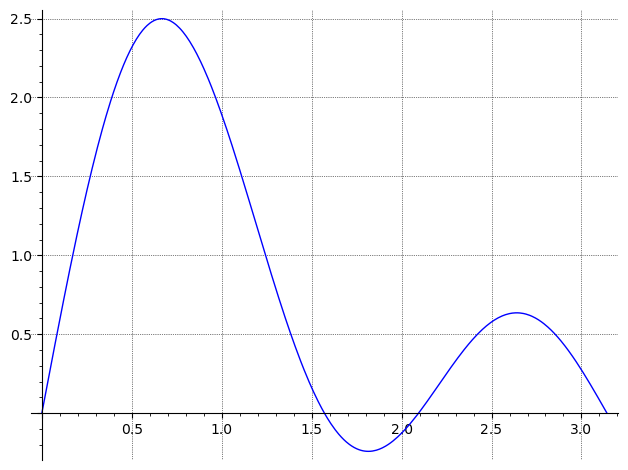

In [64]:
plot(expr.lhs(),(x,0,pi), gridlines=True)

Note que existem mais sluções do que o que o `find_root` encontrou. Ele mostra a primeira que encontra. 

Poderíamos encontar a outra restringindo o intervalo (min, max)

In [65]:
find_root(expr,.1,pi/2+.1)

1.570796326794898

Função | Sintáxe
:--- | ---
Solução simbólica | `solve(equação, variável)`
Solução numérica | `find_root(equação, min, manx)`

## Exercícios

1. Defina um polinômio de grau 3 na forma $p(x) = x^3+mx-n$. Lembre-se de definir as variáveis simbólicas antes. Agora use o solve para encontrar as soluções $p(x)=0$.

In [66]:
var('x m n')

(x, m, n)

In [67]:
p(x) = x^3+m*x-n
p

x |--> x^3 + m*x - n

In [68]:
solve(p(x),x)

[x == 1/6*m*(-I*sqrt(3) + 1)/(1/2*n + 1/6*sqrt(4/3*m^3 + 9*n^2))^(1/3) - 1/2*(1/2*n + 1/6*sqrt(4/3*m^3 + 9*n^2))^(1/3)*(I*sqrt(3) + 1), x == 1/6*m*(I*sqrt(3) + 1)/(1/2*n + 1/6*sqrt(4/3*m^3 + 9*n^2))^(1/3) - 1/2*(1/2*n + 1/6*sqrt(4/3*m^3 + 9*n^2))^(1/3)*(-I*sqrt(3) + 1), x == -1/3*m/(1/2*n + 1/6*sqrt(4/3*m^3 + 9*n^2))^(1/3) + (1/2*n + 1/6*sqrt(4/3*m^3 + 9*n^2))^(1/3)]

In [69]:
ϕ = var('ϕ', domain='real')

In [70]:
assumptions()

[alp_bar is real, phi^2 < 20, ϕ is real]

In [71]:
solve(p(ϕ).subs({m:2,n:6}),ϕ)

[ϕ == (1/9*sqrt(251)*sqrt(3) + 3)^(1/3) - 2/3/(1/9*sqrt(251)*sqrt(3) + 3)^(1/3)]

## 6. Funções e substituição de variáveis em expressões simbólicas

Uma funcionalidade muito útil em cálculos simbólicos é a substituição de exprssões com o método `.subs()`.

In [72]:
var('A B C D')
a = A+B
a

A + B

In [73]:
a.subs(A==D)

B + D

In [74]:
f(x) = A*x^2+B*x+C;f(x)

A*x^2 + B*x + C

In [75]:
f(x).subs(A==1,B==5,C==9)

x^2 + 5*x + 9

In [76]:
b = diff(f(x),x)+cos(x);b

2*A*x + B + cos(x)

In [77]:
b.subs(cos(x)==2)

2*A*x + B + 2

Podemos introduzir funções com expressão não definida

In [78]:
h(x) = function('h')(x);h

x |--> h(x)

In [79]:
c = diff(h(x),x,2)+2*f(3*x)^2;c

2*(9*A*x^2 + 3*B*x + C)^2 + diff(h(x), x, x)

In [80]:
c.subs(diff(h(x),x,2)==x/pi)

2*(9*A*x^2 + 3*B*x + C)^2 + x/pi

### 7 Constantes físicas e substituição com dicionário

In [81]:
var('M k_B G c ħ')

(M, k_B, G, c, ħ)

Radiação Hawking do buraco negro de Schwarzschild

In [82]:
T_H = 1/8*c^3*ħ/(pi*G*M*k_B)
T_H

1/8*c^3*ħ/(pi*G*M*k_B)

In [83]:
# from scipy.constants.physical_constants.

In [84]:
from scipy.constants import gravitational_constant, speed_of_light, Boltzmann, hbar

In [85]:
constantes = {k_B:Boltzmann, c:speed_of_light, G:gravitational_constant, ħ:hbar, a:2, b:57}
constantes

{k_B: 1.380649e-23,
 c: 299792458.0,
 G: 6.6743e-11,
 ħ: 1.0545718176461565e-34,
 A + B: 2,
 2*A*x + B + cos(x): 57}

In [86]:
T_H.subs(constantes).subs({M:10^30}).n()

1.22690067059402e-7

## 7. Pacotes opcionais

Alguns pacotes que não presentes na instalação básica do SageMath podem ser instalados posteriormente.

- No terminal (no Windows, utilizar o "SageMath Shell"):
  - `sage -i <nome_do_pacote>` - para instalar o pacote sage opcional
  - `sage --pip install <pip_package_name>` - para instalar um pacote Python extra utilizando `pip`.
- Em uma sessão de SageMath (no Windows, usar "SageMath" ou "SageMath Notebook"):
  - `sage: installed_packages()` - para listar todos os pacotes instalados
  - `sage: optional_packages()` - para listar pacotes opcionais instalados e disponíveis

In [87]:
# print(optional_packages())

## 8. Jupyter  notebook

### 8.1 Células

Os dois tipos principais de célula são **_code_** e **markdown**. 

Em ambos os casos, <kbd>SHIFT+ENTER</kbd> executa o conteúdo da célula e cria uma célula abaixo (se ainda não existir uma).

1. Nas células do tipo Markdown podemos colocar:

    * Texto com formatação markdown;
    * HTML;
    * LaTeX;
    * Images.

2. Nas células de código ficam os códigos do Sage, Python, ou da linguagem que você estiver utilizando.

### 8.2 Modos

Existem dois modos para as células, o **modo de comando** e o **modo de edição**. 

Você identifica o modo pela cor da moldura ao redor da célula. 

Azul para modo de comando e verde para modo de edição.

No modo de edição você altera e executa o conteúdo de uma célula.

No modo de comando você edita o notebook em si. Como inseir ou deleta células e alterar o seu tipo, usando atalhos do teclado. 

Você pode entrar no modo de comando com a tecla <kbd>ESC</kbd> e no modo de edição com o <kbd>ENTER</kbd>.

### 8.3 Atalhos do teclado

Várias funções da barra de ferramentas podem ser acessadas mais rápidamente usando atalhos do teclado no **modo de comando**.

#### Abaixo está uma pequena lista.

| Ação | Atalho |
| :---: | :---: |
| nova célula acima | <kbd>a</kbd> |
| nova célula abaixo | <kbd>b</kbd> |
| celula do tipo códico | <kbd>y</kbd> |
| celula do tipo markdown | <kbd>m</kbd> |
| salvar | <kbd>s</kbd> |
| executar a célula | <kbd>SHIFT+ENTER</kbd> |
| modo edição | <kbd>ENTER</kbd> |
| modo de comando | <kbd>ESC</kbd> |

[Site oficial](http://jupyter.org) do Jupyter

### 8.4 Exibir todas as variáveis da seção

In [88]:
whos

Variable                 Type                Data/Info
------------------------------------------------------
A                        Expression          A
B                        Expression          B
Boltzmann                float               1.380649e-23
C                        Expression          C
D                        Expression          D
G                        Expression          G
L1                       list                n=20
LL                       list                n=4
M                        Expression          M
T_H                      Expression          1/8*c^3*ħ/(pi*G*M*k_B)
X                        tuple               n=4
a                        Expression          A + B
alp_bar                  Expression          alp_bar
b                        Expression          2*A*x + B + cos(x)
c                        Expression          c
constantes               dict                n=6
eq0                      Expression          y^2 - 2*y/cos(phi) + 5/co

## 9. Markdown básico

O que é Markdown?

> Markdown is a lightweight markup language that you can use to add formatting elements to plaintext text documents. Created by John Gruber in 2004, Markdown is now one of the world’s most popular markup languages.

> Using Markdown is different than using a WYSIWYG editor. In an application like Microsoft Word, you click buttons to format words and phrases, and the changes are visible immediately. Markdown isn’t like that. When you create a Markdown-formatted file, you add Markdown syntax to the text to indicate which words and phrases should look different.

Fonte: [markdownguide](https://www.markdownguide.org/getting-started/)

### 9.1 Seções e subseções

# Nível 1
## Nível 2
### Nível 3
#### Nível 4
##### Nível 5
###### Nível 6

### 9.2 Formatação (negrito, itálico e riscado)

*Itálico*

**Negrito**

**_negrito e itálico_**

~~riscado~~

### 9.3 Ítens

* sdf
- shfsdf
+ kjshdkfj
    - kjxdhkjd
    + sdhfkjsdhf
        - oijojfdg
        - kjhdskfjh

### 9.4 Numerados

1. sdfsd
5. sdfsdf
3. fdaf
    1. ijhdsgk
    5. ijhgdfgu
    8. hgdsu
        5. sgdhfhds
        9. kjshdf

### 9.5 Código

`comando()`

### 9.6 Tabelas

medida|x | y | z
:--|:--:|:--|--
**medida 1** | 5 | 5 | 7
**medida 2** | 5 | 6 | 6 
**medida 3** | 9 | 3 | 2

`---` alinhamento padão (direita)

`:---` esquerda

`---:` direita

`:---:` centralizado

### 9.7 Citação (identação)

> I think I can safely say that nobody understands quantum mechanics.
>> Richard Feynman



### 9.8 Linha horizontal

***
***

### 9.9 Link

[texto](www.link.com.br)

### 9.10 Imagem

![nome](http://localhost:8888/static/base/images/logo.png?v=641991992878ee24c6f3826e81054a0f)

### 9.11 Equações $\LaTeX$

#### 9.11.1 Simples

$h(x) = \tan(x)$

#### 9.11.2 Centralizada

$$y(x) = x^2+2x-1$$

#### 9.11.3 Múltiplas alinhadas

$$\begin{align}
f(x) &= \cos(x)\\
g(x) &= \sin(x)
\end{align}$$

Mais informações:

* [Markdown guide](https://www.markdownguide.org/)

* [Markdown for Jupyter notebooks](https://www.ibm.com/support/knowledgecenter/SSHGWL_1.2.3/analyze-data/markd-jupyter.html)

# FIM
***